# Analysis of Crime in Chicago

## By: Jin Shutima Han, Matthew Thanos, and Tim Lexa

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import seaborn as sns
import statistics
import sys,os
import numpy as np
import matplotlib
%matplotlib inline

[matplotlib Documentation](https://matplotlib.org/contents.html)

[pandas Documentation](https://pandas.pydata.org/pandas-docs/version/0.22/)

[seaborn Documentation](https://seaborn.pydata.org)

[statistics Documentation](https://docs.python.org/3/library/statistics.html)

[numpy Documentation](https://docs.scipy.org/doc/)


# Abstract:

## Project Motivation:
### Use Python tools we learned in class to study a dataset and see if we could extract knowledge, and develop conclusions and insights. To accomplish this, we chose a dataset concerning criminal activity in Chicago over an annual period and performed various data and visual analyses to see if we could identify interesting trends.

## Obtained Results:
### Just by looking at the communities that have the most number of crimes, Austin, Near North Side, and Loop are the three communities with the most crimes. However, if we take into consideration the number of crimes per thousand residents, the most dangerous communities are then Loop, Fuller Park, West Garfield Park, North Lawndale, and Washington Park. 

### We then shifted our focus onto the most violent crimes, which are considered to be homicide, sexual assault, robbery, and assault according to the FBI. The community that has the most number of violent crimes is Austin, whose number of violent crimes committed (2161 crimes) is almost twice as large as the number of violent crimes committed by the second most violent community, South Shore (1136 crimes). Again, we took the population into consideration and the resulting communities with the most violent crimes per 1000 residents are West Garfield Park, Fuller Park, Riverdale, and East Garfield Park. 

### We then switched topics and looked at which crimes are most heavily pursued by the police. Out of the dataset of reported crimes, the type of crimes that result in the most arrests are prostitution, gambling, liquor law violations, and use of narcotics. The type of crimes that resulted in the lowest percentage of arrests are kidnapping, burglary, and deceptive practice. By skimming through the graph (named “Percentage of Each Reported Crime that Results in an Arrest), we can easily see that the more serious crimes like kidnapping, burglary, assault and homicide result in less arrests than less serious crimes like liquor law violations and prostitution. 

### We then looked at the number of arrests made in each community. The three communities with the most number of arrests are North Lawndale, West Garfield Park, and Humboldt park, in that order. Arrests in general are slightly more prevalent during warmer months, between April and July. Additionally, most crimes in our dataset did not result in arrest, as only about one-fifth of all reported crimes resulted in an arrest.

### Lastly, we wanted to observe the distribution and dynamics of specific crimes and subsets of crimes across the city of Chicago. To accomplish this, we developed clustermaps based on districts and criminal activity. We found that among the most common crimes in Chicago are domestic battery and theft under 500 dollars and that district 18 is the most criminally active district. We then performed a trend analysis of the five most common criminal activities monthly to see that the top five criminal activities are most prevalent during November to December. 

### To exhibit an even more in-depth study, we performed the same clustermap and time analysis only for crimes involving narcotics. We found that district 11 was notably the most active with regard to narcotic crimes and further observed the presence of other specific narcotic activity in other districts. In our time analysis, we found that the 3 most common narcotic involved crimes were the possession of heroin, cannabis under 30gms and crack and found that they largely follow a similar trend of activity throughout the year with slight differences. 

# Data Sources:


## 1. Crimes in Chicago from 2001 to the Present
### *For the purposes of this project, we will be limiting the time frame from 11/23/2017 to 11/23/2018*

###  Columns used are: ID number, IUCR code, Crime name, Arrest, Community area
[Crimes CSV](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data?fbclid=IwAR23nt___IyEgDVgcBck9-ICbFQ9mZ-Uxte6CiRfgE_Zl2VU4JZIvy86TQc)

In [2]:
pf = pd.read_csv("Crimes_from_2017.csv")
pf.head(1)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11182450,JA555613,11/23/17 0:01,013XX N LARRABEE ST,610,BURGLARY,FORCIBLE ENTRY,OTHER,False,False,...,27.0,8,5,1172094.0,1908941.0,2017,2/10/18 15:50,41.905586,-87.643276,"(41.905586066, -87.643275574)"


## 2. Chicago Police Department Illinois Uniform Crime Reporting Codes
### Columns used are: IUCR code, Primary description, Secondary description
[Codes CSV](https://data.cityofchicago.org/widgets/c7ck-438e)

In [3]:
pf = pd.read_csv("Codes.csv")
pf.head(1)

,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION
0,110,HOMICIDE,FIRST DEGREE MURDER


## 3. 2010 Census Data Summarized to Chicago Community Areas

[Census CSV](https://datahub.cmap.illinois.gov/dataset/2010-census-data-summarized-to-chicago-community-areas/resource/b30b47bf-bb0d-46b6-853b-47270fb7f626)

In [4]:
pf = pd.read_csv("Community_2010_Census.csv")
pf.head(2)

,GEOGNAME,GEOGKEYX,P0050001,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,...,P0130001,P0150001,P0170001,H0030001,H0030002,H0030003,H0040001,H0040002,H0040003,H0040004
0,Geog,GeogKey,Total Population,"Not Hispanic or Latino, White alone","Not Hispanic or Latino, Black or African Ameri...","Not Hispanic or Latino, American Indian and Al...","Not Hispanic or Latino, Asian alone","Not Hispanic or Latino, Native Hawaiian and Ot...","Not Hispanic or Latino, Some Other Race alone","Not Hispanic or Latino, Two or More Races",...,Median Age,Total Households,Average Household Size,Total Housing Units,Occupied Housing Units,Vacant Housing Units,Occupied Housing Units,Owned with a mortgage or a loan,Owned free and clear,Renter occupied
1,Rogers Park,1,54991,21618,14461,142,3523,39,202,1573,...,32.4,24292,2.13,27564,24292,3272,24292,6128,1009,17155


## 4. Spatial file of Chicago communities

### Will be used within Tableau to generate maps of our analysis

[Spatial GEOJSON File](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6)

## 5. Created a 'days' handle for timeseries analysis.

In [5]:
df = pd.read_csv("Crimes_from_2017.csv")
date=pd.to_datetime(df['Date'])
print(date.min())
print(date.max())
t_delta=(date-date.min()).astype('timedelta64[D]')
df['days']=t_delta
df.head(1)

2017-11-23 00:01:00
2018-11-15 23:55:00


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,days
0,11182450,JA555613,11/23/17 0:01,013XX N LARRABEE ST,610,BURGLARY,FORCIBLE ENTRY,OTHER,False,False,...,8,5,1172094.0,1908941.0,2017,2/10/18 15:50,41.905586,-87.643276,"(41.905586066, -87.643275574)",0.0


### The first recorded request is 2017-11-23 and the last is 2018-11-15.

## The below functions and hardcoded dictionary are used to set up the rest of the project, as they will be used heavily. 

### Includes:
####       -Dictionary of all crime codes, dictionary of violent crime codes, and dictionary of communities

In [6]:
# Reads the csv file and outputs a dictionary where the keys Crime's IUCR code, and the values of those keys 
# are nested dictionaries in which the keys are named "Primary" and "Secondary" and their respective values are
# the contents of columns at index 1("Primary" description) or index 2("Primary" and "Secondary description).

def all_code_dict(filepath):
    with open(filepath) as csvfile:
        l = [(line.strip()).split(',') for line in csvfile]
    codes = {}
    for list in l[1:]:
        codes[list[0]] = {}
        codes[list[0]]["Primary"] = list[1]
        codes[list[0]]["Secondary"] = list[2]
    return codes

[Link to FBI definition of violent crimes](https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/tables/table-8/table-8-state-pieces/table_8_offenses_known_to_law_enforcement_illinois_by_city_2015.xls)

In [7]:
# This is a hardcoded list of strings of crimes that are considered violent according to the FBI link above:

violent_crimes = ['HOMICIDE', 'CRIM SEXUAL ASSAULT', 'ROBBERY', 'ASSAULT']

In [8]:
#Reads the csv file and outputs a dictionary where the keys is the crime's IUCR code, and the values of those keys 
# are nested dictionaries in which the keys are named "Primary" and "Secondary" and their respective values are
# the contents of columns at index 1("Primary" description) or index 2("Primary" and "Secondary description). Same as
#code_dict but this time only violent crime

def violent_code_dict(filepath):
    with open(filepath) as csvfile:
        l = [(line.strip()).split(',') for line in csvfile]
    codes = {}
    for list in l[1:]:
        if list[1] in violent_crimes:
            codes[list[0]] = {}
            codes[list[0]]["Primary"] = list[1]
            codes[list[0]]["Secondary"] = list[2]
    return codes

In [9]:
# This is a hardcoded dictionary of communities

communities =  {
    "1": "ROGERS PARK", "2": "WEST RIDGE", "3": "UPTOWN",
    "4": "LINCOLN SQUARE", "5": "NORTH CENTER", "6": "LAKE VIEW",
    "7": "LINCOLN PARK", "8": "NEAR NORTH SIDE", "9": "EDISON PARK",
    "10": "NORWOOD PARK", "11": "JEFFERSON PARK", "12": "FOREST GLEN",
    "13": "NORTH PARK", "14": "ALBANY PARK", "15": "PORTAGE PARK",
    "16": "IRVING PARK", "17": "DUNNING", "18": "MONTCLARE",
    "19": "BELMONT CRAGIN", "20": "HERMOSA", "21": "AVONDALE",
    "22": "LOGAN SQUARE", "23": "HUMBOLDT PARK", "24": "WEST TOWN",
    "25": "AUSTIN", "26": "WEST GARFIELD PARK", "27": "EAST GARFIELD PARK",
    "28": "NEAR WEST SIDE", "29": "NORTH LAWNDALE", "30": "SOUTH LAWNDALE",
    "31": "LOWER WEST SIDE", "32": "LOOP", "33": "NEAR SOUTH SIDE",
    "34": "ARMOUR SQUARE", "35": "DOUGLAS", "36": "OAKLAND",
    "37": "FULLER PARK", "38": "GRAND BOULEVARD", "39": "KENWOOD",
    "40": "WASHINGTON PARK", "41": "HYDE PARK", "42": "WOODLAWN",
    "43": "SOUTH SHORE", "44": "CHATHAM", "45": "AVALON PARK",
    "46": "SOUTH CHICAGO", "47": "BURNSIDE", "48": "CALUMET HEIGHTS",
    "49": "ROSELAND", "50": "PULLMAN", "51": "SOUTH DEERING",
    "52": "EAST SIDE", "53": "WEST PULLMAN", "54": "RIVERDALE",
    "55": "HEGEWISCH", "56": "GARFIELD RIDGE", "57": "ARCHER HEIGHTS",
    "58": "BRIGHTON PARK", "59": "MCKINLEY PARK", "60": "BRIDGEPORT",
    "61": "NEW CITY", "62": "WEST ELSDON", "63": "GAGE PARK",
    "64": "CLEARING", "65": "WEST LAWN", "66": "CHICAGO LAWN",
    "67": "WEST ENGLEWOOD", "68": "ENGLEWOOD", "69": "GREATER GRAND CROSSING",
    "70": "ASHBURN", "71": "AUBURN GRESHAM", "72": "BEVERLY",
    "73": "WASHINGTON HEIGHTS", "74": "MOUNT GREENWOOD", "75": "MORGAN PARK",
    "76": "O'HARE", "77": "EDGEWATER",
    }


In [10]:
# Reads the csv file and outputs a dictionary where the key is the community name and the
# values are the community's population

def csv_reader_population(filepath):
    final = {}
    with open(filepath) as csvfile:
        l = [(line.strip()).split(',') for line in csvfile]
    for ll in l[2:]:
        ll[0] = ll[0].upper()
        final[ll[0]] = int(ll[l[1].index("Total Population")])
    return final

In [11]:
csv_reader_population("Community_2010_Census.csv")

{'ROGERS PARK': 54991,
 'WEST RIDGE': 71942,
 'UPTOWN': 56362,
 'LINCOLN SQUARE': 39493,
 'NORTH CENTER': 31867,
 'LAKE VIEW': 94368,
 'LINCOLN PARK': 64116,
 'NEAR NORTH SIDE': 80484,
 'EDISON PARK': 11187,
 'NORWOOD PARK': 37023,
 'JEFFERSON PARK': 25448,
 'FOREST GLEN': 18508,
 'NORTH PARK': 17931,
 'ALBANY PARK': 51542,
 'PORTAGE PARK': 64124,
 'IRVING PARK': 53359,
 'DUNNING': 41932,
 'MONTCLARE': 13426,
 'BELMONT CRAGIN': 78743,
 'HERMOSA': 25010,
 'AVONDALE': 39262,
 'LOGAN SQUARE': 72791,
 'HUMBOLDT PARK': 56323,
 'WEST TOWN': 82236,
 'AUSTIN': 98514,
 'WEST GARFIELD PARK': 18001,
 'EAST GARFIELD PARK': 20567,
 'NEAR WEST SIDE': 54881,
 'NORTH LAWNDALE': 35912,
 'SOUTH LAWNDALE': 79288,
 'LOWER WEST SIDE': 35769,
 'LOOP': 29283,
 'NEAR SOUTH SIDE': 21390,
 'ARMOUR SQUARE': 13391,
 'DOUGLAS': 18238,
 'OAKLAND': 5918,
 'FULLER PARK': 2876,
 'GRAND BOULEVARD': 21929,
 'KENWOOD': 17841,
 'WASHINGTON PARK': 11717,
 'HYDE PARK': 25681,
 'WOODLAWN': 23740,
 'SOUTH SHORE': 52010,
 'CHA

## Here is where our analysis begins. 

## Our first step was to analyze the total amount of crimes in each of the 77 Chicago communities, and so we wrote a few functions to output a dictionary, where the keys are the community names and the values are the total crimes committed in each. The output is seen below.

In [12]:
# Reads the csv file and outputs a dictionary where the Crime's ID is the keys of the dictionary, and its
# values are a nested dictionary in which the column "IUCR" is one of the keys and the column "Community" is
# the other key. The values for each nested key are the contents of the respective columns.

def csv_reader_communities(filepath):
    final = {}
    with open(filepath) as csvfile:
        l = [(line.strip()).split(',') for line in csvfile]
    for ll in l[1:]:
        final[ll[0]] = {}
        final[ll[0]]["IUCR"] = ll[l[0].index("IUCR")]
        final[ll[0]]["Community"] = ll[l[0].index("Community Area")]
    return final

In [13]:
# Computes the code to output a dictionary in which the keys are the names of the communities and the values are 
# the number of crimes reported for each communitiy

def crimes_per_community(crimes_file):
    crimes = csv_reader_communities(crimes_file)
    distribution = {}
    final = {}
    for community in communities.keys():
        count = 0
        for crime in crimes.keys():
            if community == crimes[crime]["Community"]:
                count += 1
        distribution[communities[community]] = count
    sorted_values = sorted(distribution.values())
    for value in sorted_values:
        for key in distribution.keys():
            if value == distribution[key]:
                final[key] = value
    return final

In [14]:
crimes_per_community("Crimes_from_2017.csv")

{'BURNSIDE': 361,
 'EDISON PARK': 466,
 'MOUNT GREENWOOD': 517,
 'HEGEWISCH': 605,
 'OAKLAND': 641,
 'MONTCLARE': 750,
 'ARCHER HEIGHTS': 764,
 'BEVERLY': 855,
 'FULLER PARK': 859,
 'MCKINLEY PARK': 880,
 'FOREST GLEN': 881,
 'CLEARING': 907,
 'NORTH PARK': 924,
 'ARMOUR SQUARE': 954,
 'WEST ELSDON': 994,
 'AVALON PARK': 1035,
 'EAST SIDE': 1072,
 'PULLMAN': 1094,
 'CALUMET HEIGHTS': 1276,
 'RIVERDALE': 1287,
 'NORWOOD PARK': 1314,
 'JEFFERSON PARK': 1366,
 'KENWOOD': 1380,
 'HERMOSA': 1452,
 'BRIDGEPORT': 1457,
 "O'HARE": 1464,
 'NORTH CENTER': 1547,
 'DUNNING': 1591,
 'SOUTH DEERING': 1665,
 'WEST LAWN': 1713,
 'NEAR SOUTH SIDE': 1789,
 'GARFIELD RIDGE': 1890,
 'GAGE PARK': 1941,
 'MORGAN PARK': 1980,
 'HYDE PARK': 1987,
 'BRIGHTON PARK': 2116,
 'ASHBURN': 2190,
 'LOWER WEST SIDE': 2233,
 'LINCOLN SQUARE': 2281,
 'AVONDALE': 2281,
 'DOUGLAS': 2470,
 'ALBANY PARK': 2517,
 'EDGEWATER': 2613,
 'WASHINGTON PARK': 2733,
 'IRVING PARK': 2862,
 'WASHINGTON HEIGHTS': 2962,
 'GRAND BOULEVARD'

In [15]:
# Draws the bar graph of crimes per community

def barplot_crimes_per_com(filepath):
    total_crimes = crimes_per_community(filepath)
    plt.figure(figsize=(14, 17))
    for key in total_crimes.keys():
        plt.barh(key, total_crimes[key])
    plt.title("Number of Crimes in Each Chicago Community")
    plt.xlabel("Number of Crimes in the Last 12 Months")
    plt.ylabel("Communities")
    plt.show()
    return None

## The below graph showcases the total amount of crimes in each community, showing that the majority of communities are relatively low in crime.

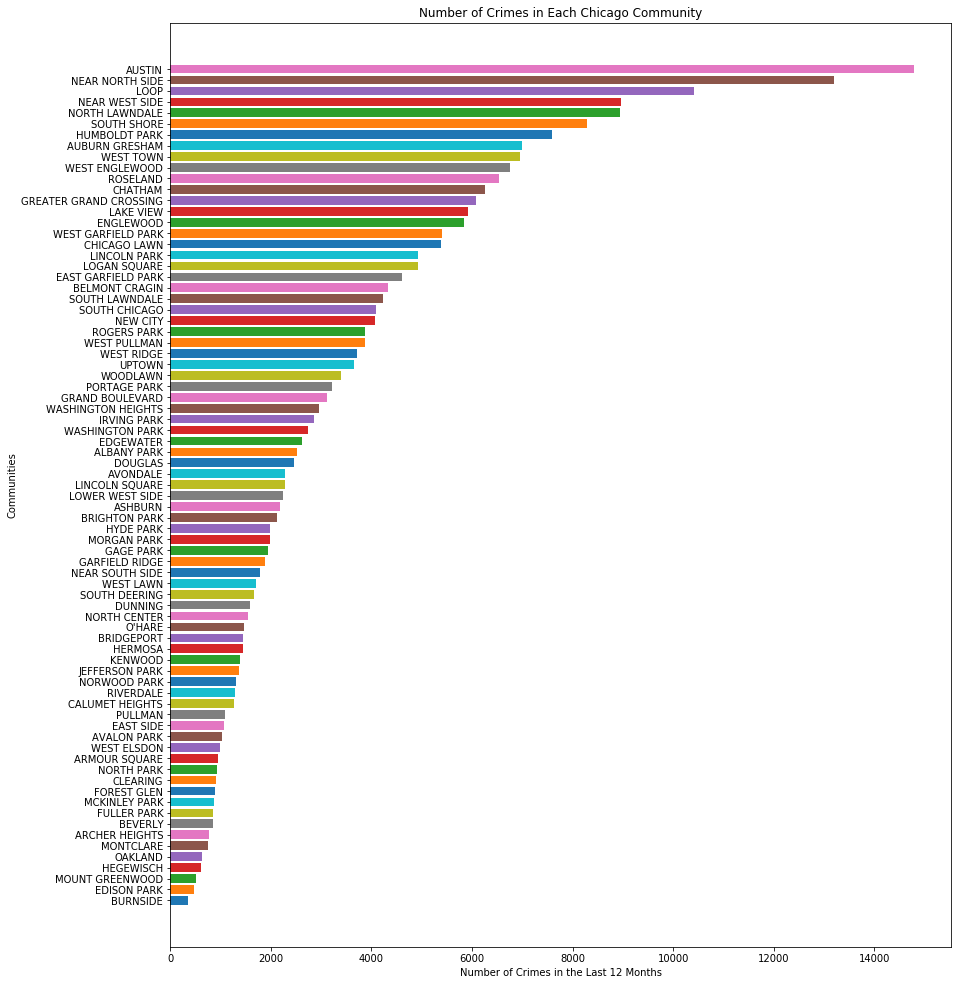

In [16]:
barplot_crimes_per_com("Crimes_from_2017.csv")

## While the previous visualization provides a big picture insight into the various communities, it also is not entirely accurate, as it does not account for the population of each community. And so we wrote the below function, calculating the amount of crimes in each for every thousand residents

In [17]:
def crimes_per_thousand(crimefile, popfile):
    population = csv_reader_population(popfile)
    crimes = crimes_per_community(crimefile)
    final = {}
    for key in population.keys():
        rate = crimes[key] / population[key]
        final[key] = round(1000 * rate, 2)
    return final

In [18]:
crimes_per_thousand("Crimes_from_2017.csv", "Community_2010_Census.csv")

{'ROGERS PARK': 70.43,
 'WEST RIDGE': 51.67,
 'UPTOWN': 64.8,
 'LINCOLN SQUARE': 57.76,
 'NORTH CENTER': 48.55,
 'LAKE VIEW': 62.75,
 'LINCOLN PARK': 76.89,
 'NEAR NORTH SIDE': 163.91,
 'EDISON PARK': 41.66,
 'NORWOOD PARK': 35.49,
 'JEFFERSON PARK': 53.68,
 'FOREST GLEN': 47.6,
 'NORTH PARK': 51.53,
 'ALBANY PARK': 48.83,
 'PORTAGE PARK': 50.14,
 'IRVING PARK': 53.64,
 'DUNNING': 37.94,
 'MONTCLARE': 55.86,
 'BELMONT CRAGIN': 54.87,
 'HERMOSA': 58.06,
 'AVONDALE': 58.1,
 'LOGAN SQUARE': 67.66,
 'HUMBOLDT PARK': 134.9,
 'WEST TOWN': 84.57,
 'AUSTIN': 150.16,
 'WEST GARFIELD PARK': 300.04,
 'EAST GARFIELD PARK': 224.0,
 'NEAR WEST SIDE': 163.28,
 'NORTH LAWNDALE': 249.05,
 'SOUTH LAWNDALE': 53.49,
 'LOWER WEST SIDE': 62.43,
 'LOOP': 355.7,
 'NEAR SOUTH SIDE': 83.64,
 'ARMOUR SQUARE': 71.24,
 'DOUGLAS': 135.43,
 'OAKLAND': 108.31,
 'FULLER PARK': 298.68,
 'GRAND BOULEVARD': 142.19,
 'KENWOOD': 77.35,
 'WASHINGTON PARK': 233.25,
 'HYDE PARK': 77.37,
 'WOODLAWN': 142.71,
 'SOUTH SHORE': 15

## In order the properly visualize the analysis we had just performed, we combined our results from the previous function with the spatial file we had downloaded, and then used Tableau to generate the below choropleth map

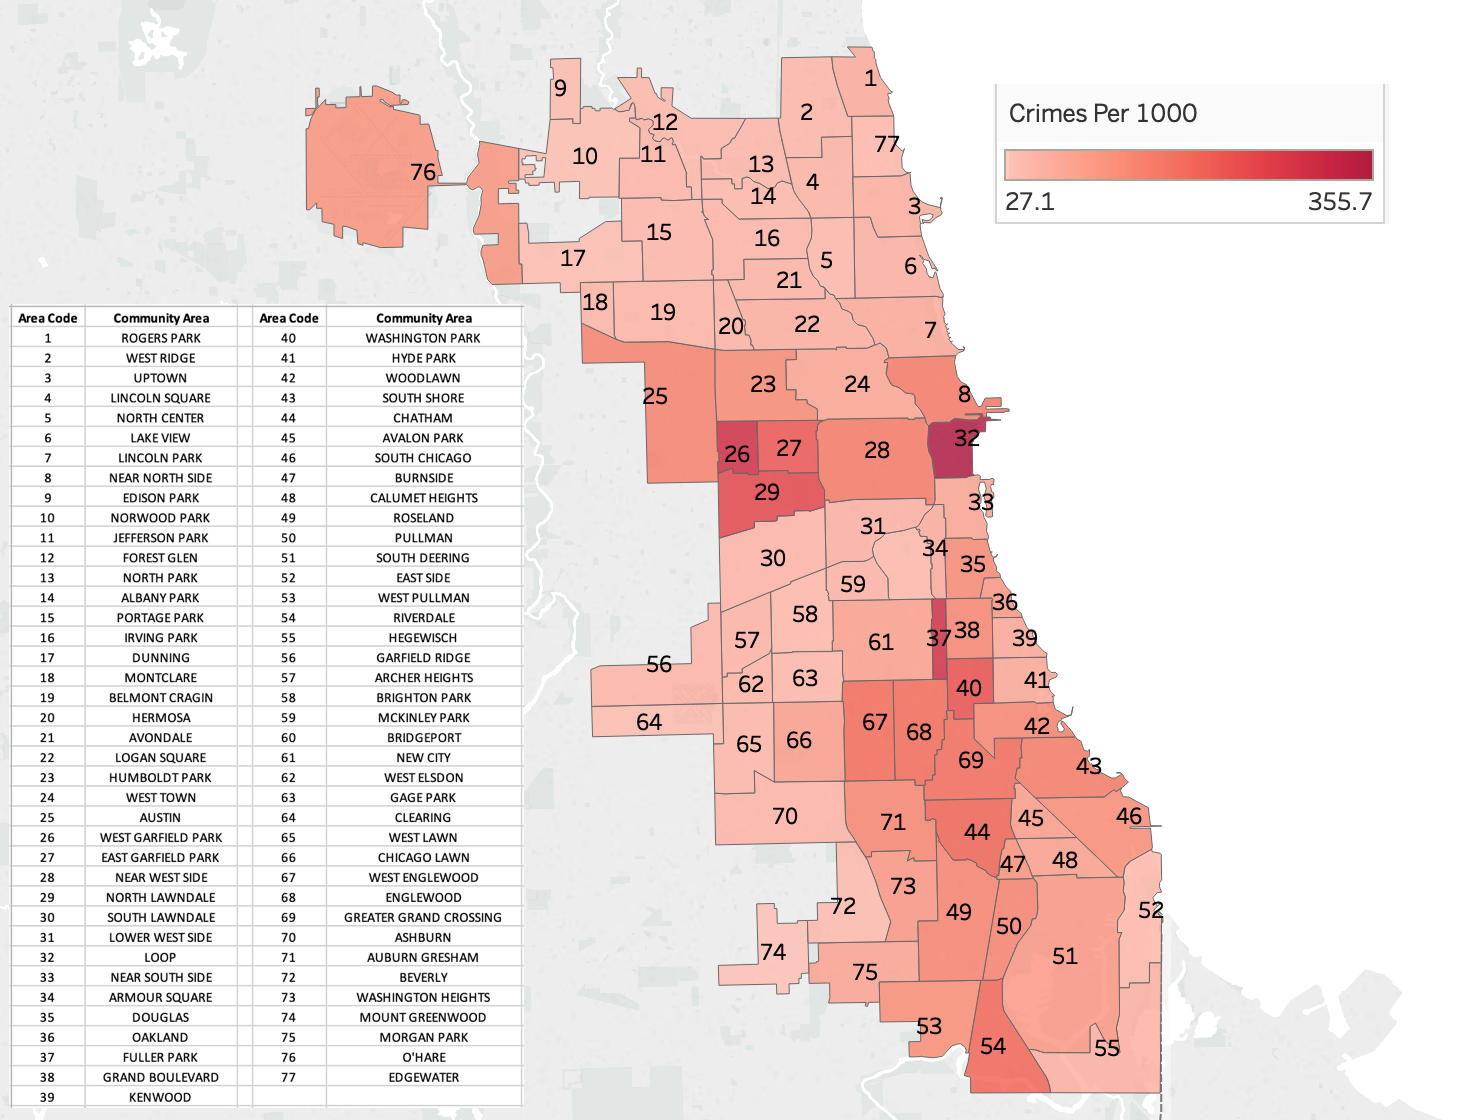

## Now that we had analyzed the total crimes in each community, we decided to focus solely on violent crimes, as defined by the FBI as Homicide, Assault, Robbery, and Sexual Assault. We wrote functions that would generate another dictionary, this one containing the community names as keys, and the number of violent crimes in each as the values, seen below.

In [19]:
# Computes a dictionary in which the keys are the community names and its values are the number of violent crimes
# committed

def violent_crimes_per_community(crimes_file, codes_file):
    crimes = csv_reader_communities(crimes_file)
    violent_dict = violent_code_dict(codes_file)
    distribution = {}
    final = {}
    for community in communities.keys():
        count = 0
        for crime in crimes.keys():
            if crimes[crime]["Community"] == community:
                if crimes[crime]["IUCR"] in violent_dict.keys():
                    count += 1
        distribution[communities[community]] = count
    keylist = crimes_per_community(crimes_file).keys()
    for key in keylist:
        final[key] = distribution[key]
    return final

In [20]:
violent_crimes_per_community("Crimes_from_2017.csv", "Codes.csv")

{'BURNSIDE': 58,
 'EDISON PARK': 69,
 'MOUNT GREENWOOD': 43,
 'HEGEWISCH': 68,
 'OAKLAND': 90,
 'MONTCLARE': 94,
 'ARCHER HEIGHTS': 80,
 'BEVERLY': 69,
 'FULLER PARK': 116,
 'MCKINLEY PARK': 106,
 'FOREST GLEN': 118,
 'CLEARING': 74,
 'NORTH PARK': 80,
 'ARMOUR SQUARE': 136,
 'WEST ELSDON': 94,
 'AVALON PARK': 140,
 'EAST SIDE': 133,
 'PULLMAN': 120,
 'CALUMET HEIGHTS': 191,
 'RIVERDALE': 213,
 'NORWOOD PARK': 143,
 'JEFFERSON PARK': 176,
 'KENWOOD': 191,
 'HERMOSA': 177,
 'BRIDGEPORT': 165,
 "O'HARE": 83,
 'NORTH CENTER': 159,
 'DUNNING': 162,
 'SOUTH DEERING': 222,
 'WEST LAWN': 175,
 'NEAR SOUTH SIDE': 189,
 'GARFIELD RIDGE': 155,
 'GAGE PARK': 248,
 'MORGAN PARK': 200,
 'HYDE PARK': 225,
 'BRIGHTON PARK': 284,
 'ASHBURN': 277,
 'LOWER WEST SIDE': 293,
 'LINCOLN SQUARE': 264,
 'AVONDALE': 276,
 'DOUGLAS': 345,
 'ALBANY PARK': 322,
 'EDGEWATER': 281,
 'WASHINGTON PARK': 376,
 'IRVING PARK': 292,
 'WASHINGTON HEIGHTS': 337,
 'GRAND BOULEVARD': 458,
 'PORTAGE PARK': 372,
 'WOODLAWN': 4

In [21]:
# Plots the bar graph for the most violent crimes per community

def barplot_violent_crimes_per_com(filepath, code_file):
    total_crimes = violent_crimes_per_community(filepath, code_file)
    plt.figure(figsize=(14, 17))
    for key in total_crimes.keys():
        plt.barh(key, total_crimes[key])
    plt.title("Number of Violent Crimes in Each Chicago Community")
    plt.xlabel("Number of Violent Crimes in the Last 12 Months")
    plt.ylabel("Communities")
    plt.show()
    return None

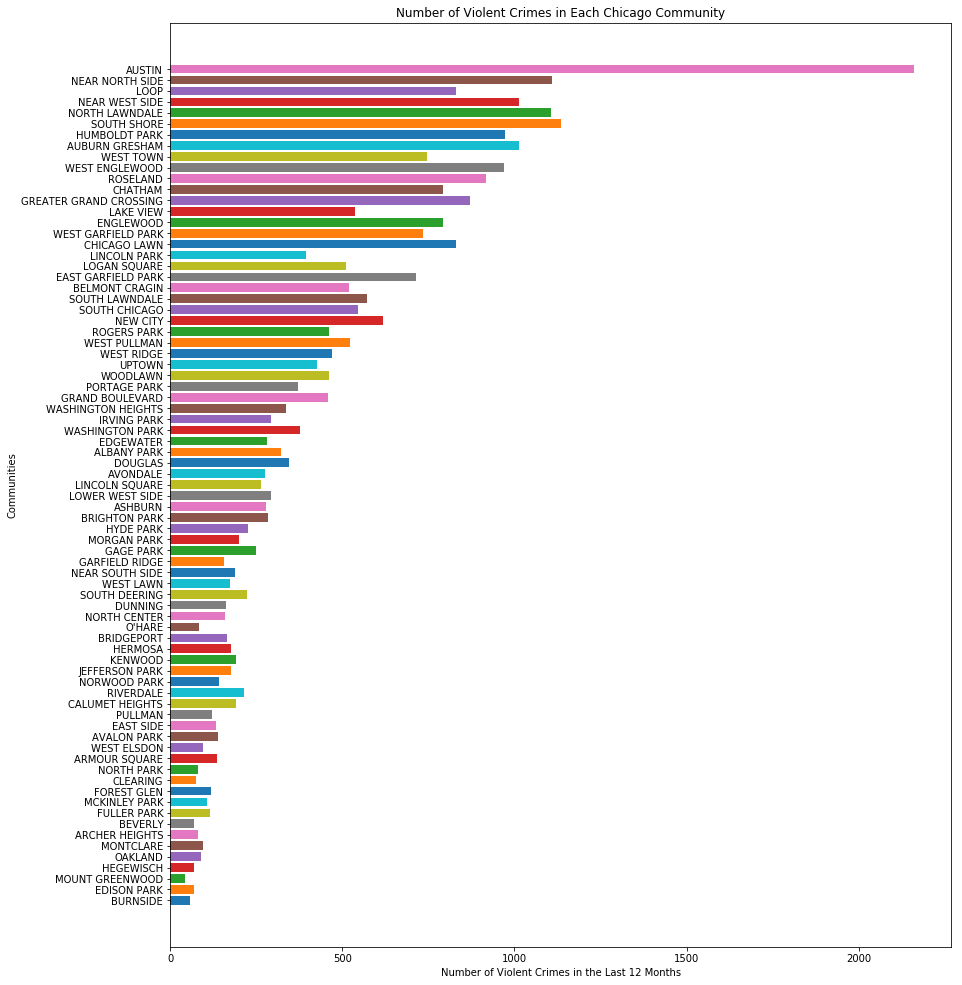

In [22]:
barplot_violent_crimes_per_com("Crimes_from_2017.csv", "Codes.csv")

## Again, while the above analysis does provide a raw look at the violence in each community, it does not account for population. And so we calculated the violent crimes per 1000 residents in order to find more insight as to which community is truly the most violent. 

In [23]:
def violent_crimes_per_thousand(crimefile, popfile, codesfile):
    population = csv_reader_population(popfile)
    v_crimes = violent_crimes_per_community(crimefile, codesfile)
    final = {}
    for key in population.keys():
        rate = v_crimes[key] / population[key]
        final[key] = round(1000 * rate, 2)
    return final

In [24]:
violent_crimes_per_thousand("Crimes_from_2017.csv", "Community_2010_Census.csv", "Codes.csv")

{'ROGERS PARK': 8.37,
 'WEST RIDGE': 6.52,
 'UPTOWN': 7.58,
 'LINCOLN SQUARE': 6.68,
 'NORTH CENTER': 4.99,
 'LAKE VIEW': 5.69,
 'LINCOLN PARK': 6.15,
 'NEAR NORTH SIDE': 13.77,
 'EDISON PARK': 6.17,
 'NORWOOD PARK': 3.86,
 'JEFFERSON PARK': 6.92,
 'FOREST GLEN': 6.38,
 'NORTH PARK': 4.46,
 'ALBANY PARK': 6.25,
 'PORTAGE PARK': 5.8,
 'IRVING PARK': 5.47,
 'DUNNING': 3.86,
 'MONTCLARE': 7.0,
 'BELMONT CRAGIN': 6.59,
 'HERMOSA': 7.08,
 'AVONDALE': 7.03,
 'LOGAN SQUARE': 7.01,
 'HUMBOLDT PARK': 17.28,
 'WEST TOWN': 9.08,
 'AUSTIN': 21.94,
 'WEST GARFIELD PARK': 40.72,
 'EAST GARFIELD PARK': 34.76,
 'NEAR WEST SIDE': 18.48,
 'NORTH LAWNDALE': 30.83,
 'SOUTH LAWNDALE': 7.23,
 'LOWER WEST SIDE': 8.19,
 'LOOP': 28.38,
 'NEAR SOUTH SIDE': 8.84,
 'ARMOUR SQUARE': 10.16,
 'DOUGLAS': 18.92,
 'OAKLAND': 15.21,
 'FULLER PARK': 40.33,
 'GRAND BOULEVARD': 20.89,
 'KENWOOD': 10.71,
 'WASHINGTON PARK': 32.09,
 'HYDE PARK': 8.76,
 'WOODLAWN': 19.42,
 'SOUTH SHORE': 21.84,
 'CHATHAM': 25.56,
 'AVALON PAR

## Again, we created a choropleth map in Tableau by combining the above results with our spatial file, producing the below:

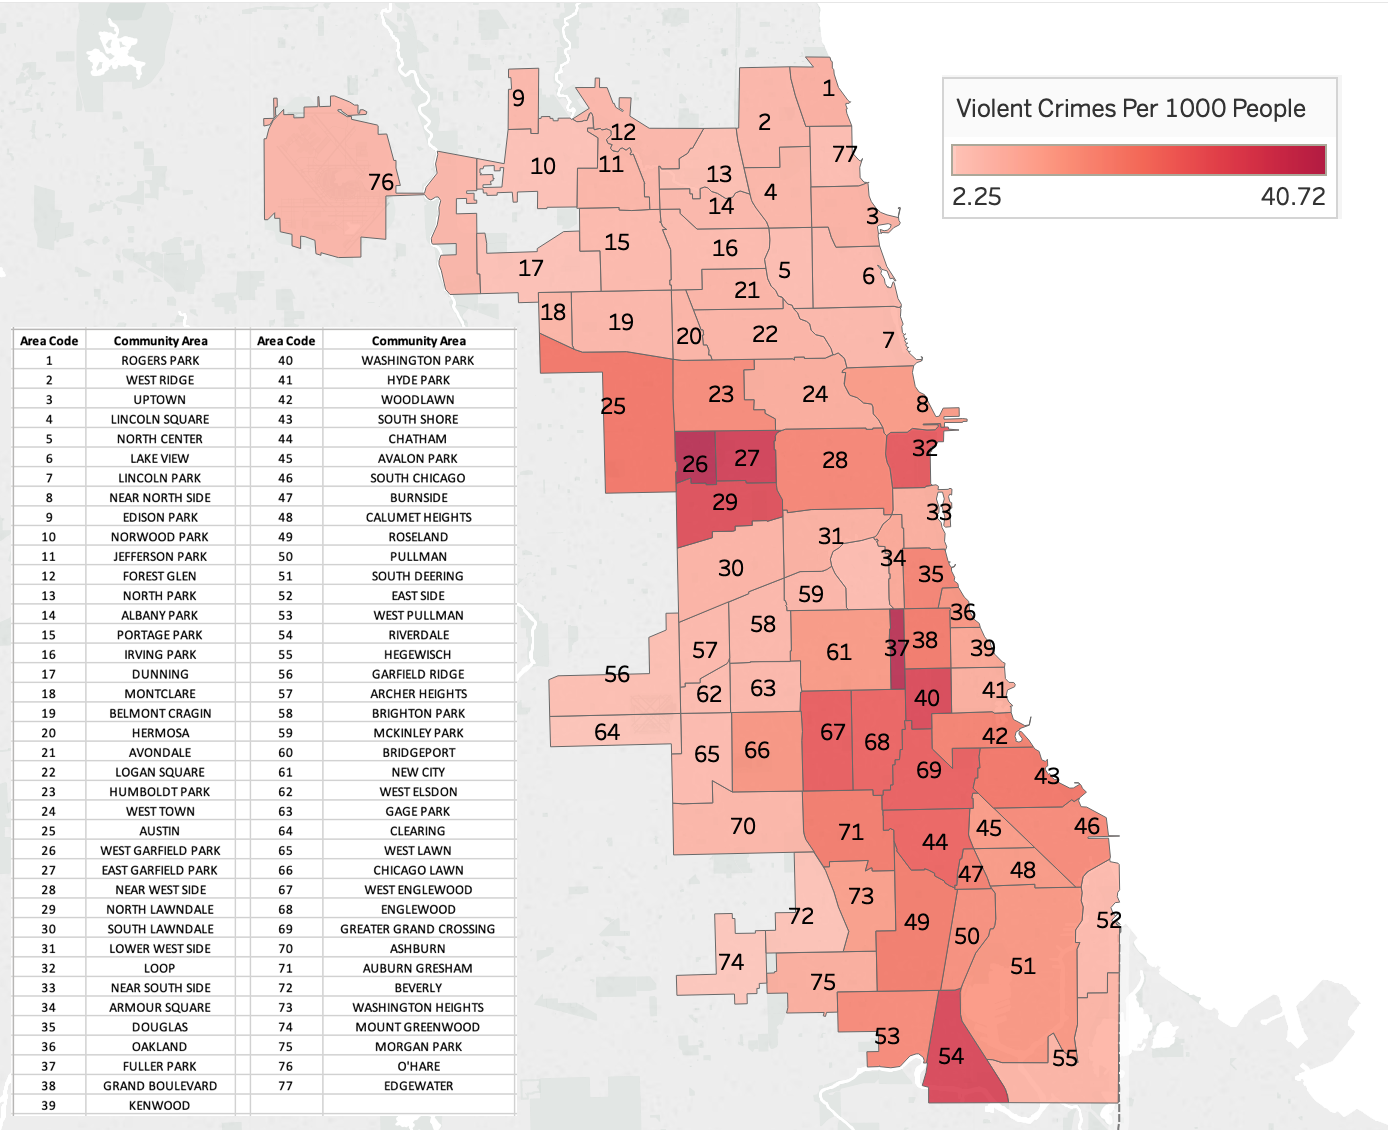

## Next, we took a step back from analyzing the communities and looked into the crimes themselves. We wanted to see which crimes are the most heavily pursued by the police, and so we generated a dictionary, where the keys are the types of crimes, and the values are the percentage of each reported crime that results in an arrest, seen below. 

In [25]:
# Reads the csv file to output a dictionary in which the keys are the crimes' IDs and their values are a nested
# dictionary in which the keys are always "Primary Type" and their values are the respective crime names for each
# ID

def csv_crime_types(filepath):
    final = {}
    with open(filepath) as csvfile:
        l = [(line.strip()).split(',') for line in csvfile]
    for ll in l[1:]:
        final[ll[0]] = {}
        final[ll[0]]["Primary Type"] = ll[l[0].index("Primary Type")]
    return final

In [26]:
# Reads the csv file and outputs a dictionary in which the keys are the the crimes' IDs and their values are a nested
# dictionary in which the keys are "Primary Type" and "Arrest", and their respective values are the crime names and 
# booleans to indiciate if the crime resulted in arrest

def csv_reader_arrests(filepath):
    final = {}
    with open(filepath) as csvfile:
        l = [(line.strip()).split(',') for line in csvfile]
    for ll in l[1:]:
        final[ll[0]] = {}
        final[ll[0]]["Primary Type"] = ll[l[0].index("Primary Type")]
        final[ll[0]]["Arrest"] = ll[l[0].index("Arrest")]
    return final

In [27]:
# Outputs a dictionary in which the keys are the names of the crimes and their values are the number of arrests
# of that particular crime

def arrests_per_crime(crimes_file):
    crimes = csv_reader_arrests(crimes_file)
    distribution = {}
    final = {}
    list_of_crimes = []
    for key in crimes.keys():
        if crimes[key]['Primary Type'] not in list_of_crimes:
            list_of_crimes.append(crimes[key]['Primary Type'])
    for crime in list_of_crimes:
        count = 0
        for c in crimes.keys():
            if crime == crimes[c]["Primary Type"]:
                if crimes[c]["Arrest"] == "TRUE":
                    count += 1
        distribution[crime] = count
    sorted_values = sorted(distribution.values())
    for value in sorted_values:
        for key in distribution.keys():
            if value == distribution[key]:
                final[key] = value
    return final

In [28]:
def csv_reader_crimes_arrests(filepath):
    final = {}
    with open(filepath) as csvfile:
        l = [(line.strip()).split(',') for line in csvfile]
    for ll in l[1:]:
        final[ll[0]] = {}
        final[ll[0]]["Primary Type"] = ll[l[0].index("Primary Type")]
    return final

In [29]:
# Outputs a dictionary in which the keys are the names of the crimes and the values are the numbers of reported
# instances for that particular crime

def crimes_per_type(filepath):
    crimes = csv_reader_crimes_arrests(filepath)
    list_of_crimes = []
    final = {}
    for key in crimes.keys():
        if crimes[key]['Primary Type'] not in list_of_crimes:
            list_of_crimes.append(crimes[key]['Primary Type'])
    for crime in list_of_crimes:
        count = 0
        for c in crimes.keys():
            if crime == crimes[c]["Primary Type"]:
                count += 1 
        final[crime] = count
    return final

In [30]:
# Outputs a dictionary in which the keys are the names of the crimes and the values are the percentages of reported
# crimes that end in an arrest for that particular crime type

def arrest_percentages_per_crime(filepath):
    crimes = crimes_per_type(filepath)
    arrests = arrests_per_crime(filepath)
    final = {}
    percentages = {}
    for key in crimes.keys():
        percentages[key] = round((arrests[key] / crimes[key]) * 100, 2)
    sorted_values = sorted(percentages.values())
    for value in sorted_values:
        for key in percentages.keys():
            if value == percentages[key]:
                final[key] = value
    return final

In [31]:
arrest_percentages_per_crime("Crimes_from_2017.csv")

{'KIDNAPPING': 3.61,
 'BURGLARY': 4.09,
 'DECEPTIVE PRACTICE': 4.22,
 'MOTOR VEHICLE THEFT': 5.3,
 'CRIM SEXUAL ASSAULT': 5.32,
 'ARSON': 5.57,
 'NON-CRIMINAL': 5.71,
 'CRIMINAL DAMAGE': 5.83,
 'INTIMIDATION': 6.17,
 'ROBBERY': 7.38,
 'HUMAN TRAFFICKING': 8.33,
 'THEFT': 9.67,
 'STALKING': 10.0,
 'OFFENSE INVOLVING CHILDREN': 11.26,
 'SEX OFFENSE': 13.65,
 'ASSAULT': 15.31,
 'HOMICIDE': 18.68,
 'BATTERY': 19.12,
 'OTHER OFFENSE': 19.9,
 'OTHER NARCOTIC VIOLATION': 33.33,
 'NON-CRIMINAL (SUBJECT SPECIFIED)': 33.33,
 'CRIMINAL TRESPASS': 54.46,
 'PUBLIC PEACE VIOLATION': 57.7,
 'WEAPONS VIOLATION': 69.57,
 'OBSCENITY': 79.31,
 'PUBLIC INDECENCY': 92.31,
 'INTERFERENCE WITH PUBLIC OFFICER': 94.68,
 'CONCEALED CARRY LICENSE VIOLATION': 95.74,
 'NARCOTICS': 98.63,
 'LIQUOR LAW VIOLATION': 98.84,
 'GAMBLING': 99.51,
 'PROSTITUTION': 100.0}

In [32]:
# Displays a bar plot for the percentages of arrests that have occurred for each crime

def barplot_arrest_percentages_per_crime(filepath):
    percentages = arrest_percentages_per_crime(filepath)
    plt.figure(figsize=(14, 17))
    for key in percentages.keys():
        plt.barh(key, percentages[key])
    plt.title("Percentage of Each Reported Crime that Results in an Arrest")
    plt.xlabel("Percentage for Each Crime")
    plt.ylabel("Crimes")
    plt.show()
    return None

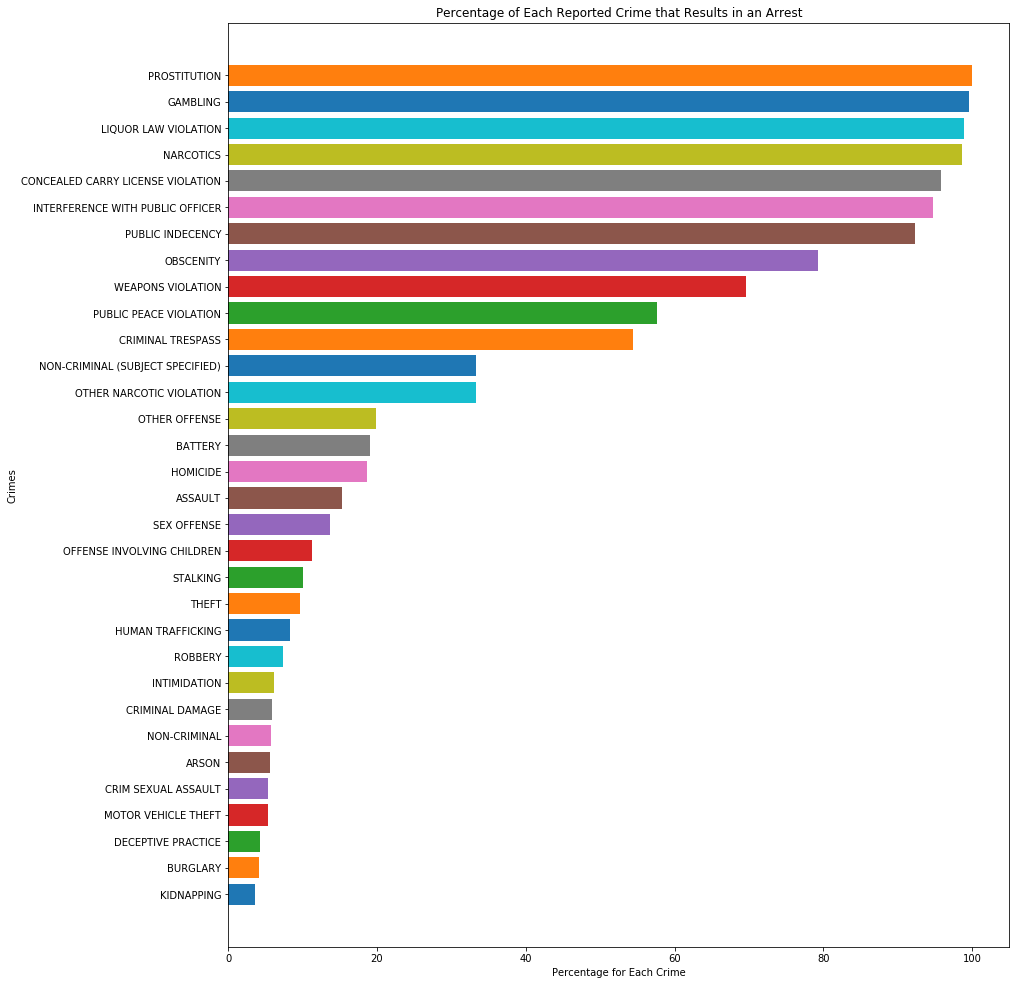

In [33]:
barplot_arrest_percentages_per_crime("Crimes_from_2017.csv")

## The biggest conclusion to be drawn from this analysis is the discrepancy in arrests. Very serious crimes, such as assault and homicide, result in arrests far less often than more trivial crimes such as liquor law violations. 

## An explanation of this is that for the crime to have been entered into the database, a police officer would have had to actually file a report. Therefore, crimes are only entered into the database when an officer actually encounters the crime. And in these instances, in order to encounter the crime, the officer most likely encounters the offender themself, allowing them to make an arrest much more often. 

## This is not to downplay the low arrest percentage for the more serious crimes. Looking at homicide, it's logical to assume that nearly every homicide is reported, due to the nature of the crime. Yet, less than 20% of homicides result in an arrest, which as seen below, is less than one-third of the national average

[National Murder Clearance Rate is Over Three Times Higher Than Chicago's](https://www.usatoday.com/story/news/2018/08/10/u-s-homicide-clearance-rate-crisis/951681002/?fbclid=IwAR0vI5KQ7oeDC4ophFr--QOnB4b02UZ5y3L53qU1wMuh5Mq0sG9cnROVPvU)

## Finally, we decided to look into the arrests in each community in an attempt to analyze the police presence in each community. So we generated a dictionary with the communities as keys and the percentage of reported crimes that result in an arrest as the values, seen below.

In [34]:
# Reads the csv file and outputs a dictionary in which the keys are the ]- and the values are a 
# nested dictionary in which the keys are "Arrest" and "Community" and their values are a boolean (to indicate if
# the crime has resulted in an arrest)

def csv_reader_communities_and_arrests(filepath):
    final = {}
    with open(filepath) as csvfile:
        l = [(line.strip()).split(',') for line in csvfile]
    for ll in l[1:]:
        final[ll[0]] = {}
        final[ll[0]]["Arrest"] = ll[l[0].index("Arrest")]
        final[ll[0]]["Community"] = ll[l[0].index("Community Area")]
    return final

In [35]:
# Outputs a dictionary in which the community names are the keys and their values are the number of arrests that have
# occurred for each community

def arrests_per_community(filepath):
    crimes = csv_reader_communities_and_arrests(filepath)
    distribution = {}
    final = {}
    for community in communities.keys():
        count = 0
        for crime in crimes.keys():
            if crimes[crime]["Community"] == community:
                if crimes[crime]["Arrest"] == "TRUE":
                    count += 1
        distribution[communities[community]] = count
    keylist = crimes_per_community(filepath).keys()
    for key in keylist:
        final[key] = distribution[key]
    return final

In [36]:
# Outputs a dictionary in which the names of the communities are the keys and their values are percentages of arrests
# of that particular community

def arrest_percentages_per_community(filepath):
    crimes_in_communities = crimes_per_community(filepath)
    arrests_in_communities = arrests_per_community(filepath)
    final = {}
    for community in crimes_in_communities.keys():
        final[community] = round((arrests_in_communities[community] / crimes_in_communities[community]) * 100, 2)
    return final

In [37]:
arrest_percentages_per_community("Crimes_from_2017.csv")

{'BURNSIDE': 24.65,
 'EDISON PARK': 4.08,
 'MOUNT GREENWOOD': 10.44,
 'HEGEWISCH': 17.02,
 'OAKLAND': 5.62,
 'MONTCLARE': 8.53,
 'ARCHER HEIGHTS': 11.13,
 'BEVERLY': 10.06,
 'FULLER PARK': 22.0,
 'MCKINLEY PARK': 15.45,
 'FOREST GLEN': 3.97,
 'CLEARING': 10.69,
 'NORTH PARK': 9.63,
 'ARMOUR SQUARE': 13.0,
 'WEST ELSDON': 14.89,
 'AVALON PARK': 15.65,
 'EAST SIDE': 21.46,
 'PULLMAN': 29.98,
 'CALUMET HEIGHTS': 17.24,
 'RIVERDALE': 22.14,
 'NORWOOD PARK': 7.15,
 'JEFFERSON PARK': 8.93,
 'KENWOOD': 8.99,
 'HERMOSA': 17.15,
 'BRIDGEPORT': 13.59,
 "O'HARE": 23.09,
 'NORTH CENTER': 6.4,
 'DUNNING': 10.18,
 'SOUTH DEERING': 24.2,
 'WEST LAWN': 16.7,
 'NEAR SOUTH SIDE': 14.14,
 'GARFIELD RIDGE': 18.73,
 'GAGE PARK': 18.91,
 'MORGAN PARK': 20.15,
 'HYDE PARK': 8.96,
 'BRIGHTON PARK': 16.73,
 'ASHBURN': 8.86,
 'LOWER WEST SIDE': 17.29,
 'LINCOLN SQUARE': 10.78,
 'AVONDALE': 11.0,
 'DOUGLAS': 17.61,
 'ALBANY PARK': 9.65,
 'EDGEWATER': 13.78,
 'WASHINGTON PARK': 16.36,
 'IRVING PARK': 7.06,
 'WASH

In [38]:
# Draws a bar graph of the percentages of arrest for each community

def barplot_arrest_percentages_per_community(filepath):
    percentages = arrest_percentages_per_community(filepath)
    plt.figure(figsize=(14, 17))
    for key in percentages.keys():
        plt.barh(key, percentages[key])
    plt.title("Percentage of Reported Crime Resulting in Arrest in Each Community")
    plt.xlabel("Percentage for Each Community")
    plt.ylabel("Community")
    plt.show()
    return None

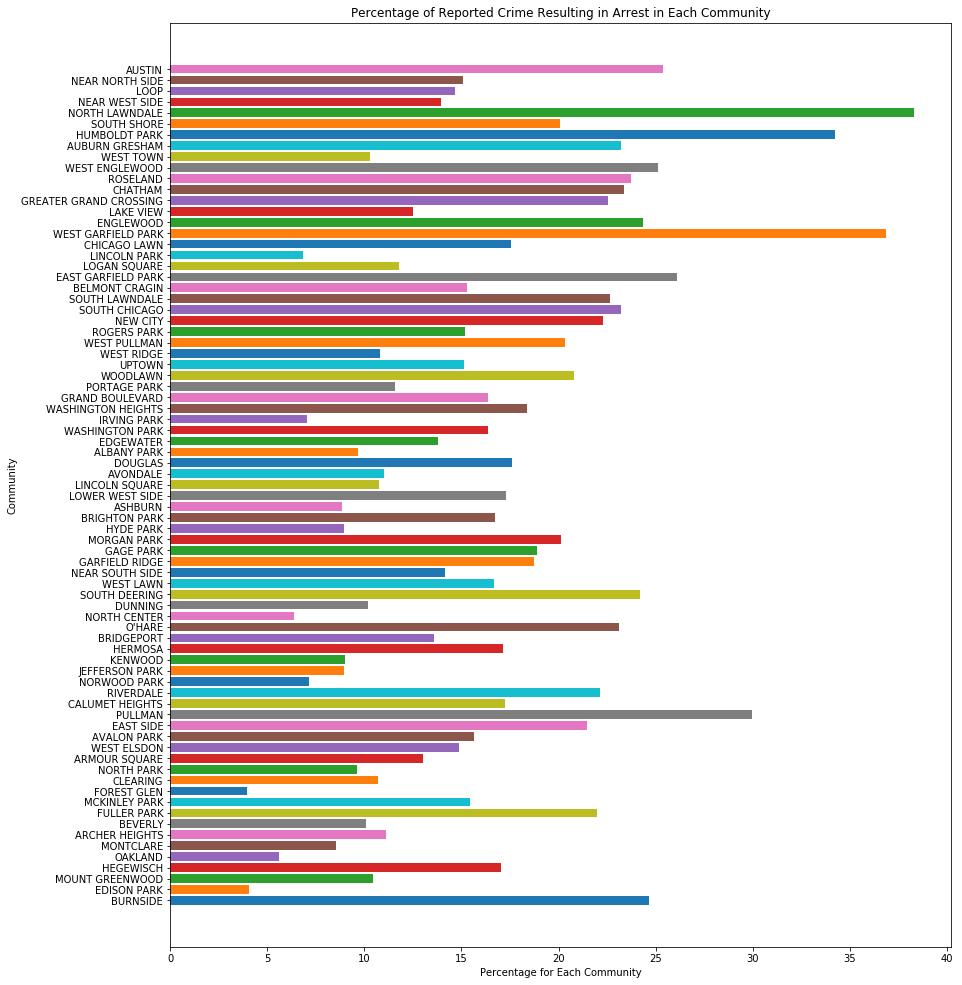

In [39]:
barplot_arrest_percentages_per_community("Crimes_from_2017.csv")

## Somewhat surprisingly, there does not seem to be much of a trend, if any at all. What we can draw from this is that the police have been spreading their enforcement presence evenly throughout the communities, instead of focusing their presence in the communities that most need it. 

## The following line graphs depict the number of arrests monthly, weekly, and daily respectively.
### The y-axis shows the number of arrests and the X-axis shows the date.

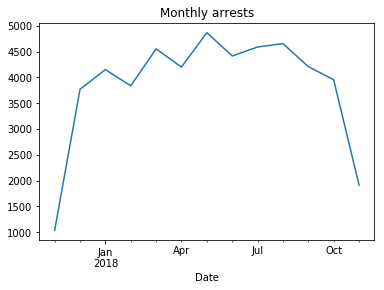

In [40]:
crimes = read_csv('Crimes_from_2017.csv', index_col='Date')


crimes = crimes.iloc[:, 3: ] #selects rows and columns by number in the order appeared in data frame
crimes.index = pd.to_datetime(crimes.index) #converts string Date time into Python Date time object


## Monthly crimes
arrest_monthly = crimes[crimes['Arrest'] == True]['Arrest']

plt.subplot()
# Monthly arrest
arrest_monthly.resample('M').sum().plot() #resamples to months
plt.title('Monthly arrests')
plt.show()

## On the monthly arrests graph, we can see that arrests are much less frequent during the month of November. The number of arrests starts to decrease in October, hits the lowest point during November, then immediently starts increasing again. There is a faint trend in which the arrests are slightly more common during warmer months than colder ones.

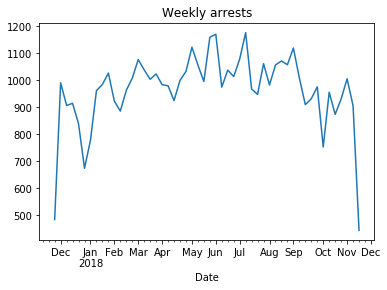

In [41]:
# Weekly arrest
arrest_monthly.resample('W').sum().plot() #resamples to weeks
plt.title('Weekly arrests')
plt.show()

## From the weekly arrests graph, we can see a similar trend to the montly arrests graph, where during November, arrests are less frequent (perhaps due to Thanksgiving). However, the frequency steeply increases again before the month even changes to December. Arrests also increase moderately during the warmer months.

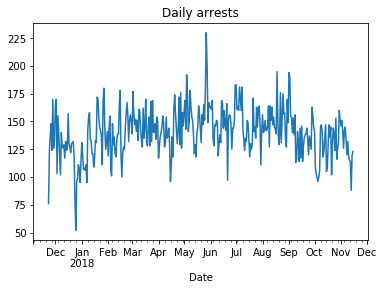

In [42]:
# Daily arrest
arrest_monthly.resample('D').sum().plot() #resamples to days
plt.title('Daily arrests')
plt.show()
plt.show()

## Looking at the daily arrests graph, we can see that there is a stark increase of arrests around the end of May and the start of June. On the other hand, the number of arrests are lowest around the end of December.

## We were also curious as to how frequently crimes actually resulted in arrests overall. The graph below depicts that there are overall more crimes that did not result in arrest than those that did result in arrest.

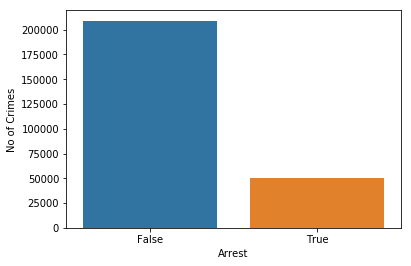

In [43]:
sns.countplot(x='Arrest', data=crimes)
plt.ylabel('No of Crimes')
plt.show()

## Here, we take a closer look at the number of reports for each crime

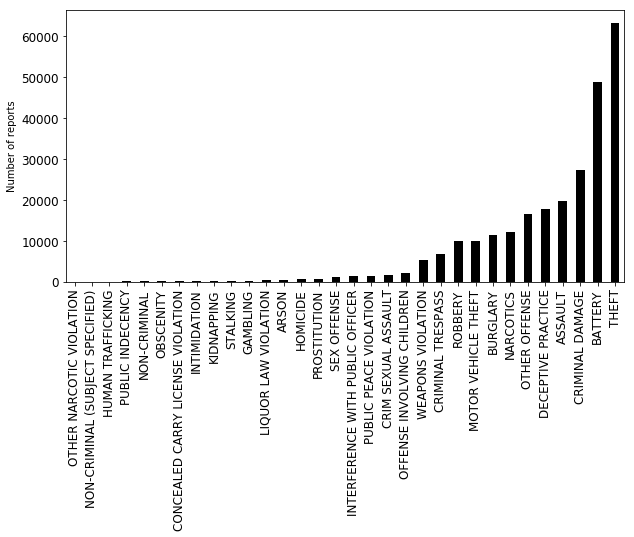

In [44]:
def plotdat(data,cat):
    l=data.groupby(cat).size()
    l=l.sort_values()
    fig=plt.figure(figsize=(10,5))
    plt.yticks(fontsize=8)
    l.plot(kind='bar',fontsize=12,color='k')
    plt.xlabel('')
    plt.ylabel('Number of reports',fontsize=10)

plotdat(df,'Primary Type')

## Let's get a detailed view by examining 'Description', which represents a crime type.

In [45]:
l=df.groupby('Description').size()
l=l.sort_values()
print(l.shape)

(296,)


## There are 296 different crime types; we can slice this data by percentile and peek at the top types of crime for each District. We switched from analyzing communites to analyzing districts because the sheer number of communities would not be viable to visualize properly. Furthermore, the objective in this analysis is to see the spread of common crimes throughout the entire city of Chicago, not the individual community areas. 

### Please see the below map outlining the different districts and the communities within each. 

![Map](chicago-police-district-map-community-areas.jpg)

In [46]:
def types_districts(df,per):
    
    # Group by crime type and district 
    hoods_per_type=df.groupby('Description').District.value_counts(sort=True)
    t=hoods_per_type.unstack().fillna(0)
    
    # Sort by hood sum
    hood_sum=t.sum(axis=0)
    hood_sum=hood_sum.sort_values(ascending=False)
    t=t[hood_sum.index]
    
    # Filter by crime per district
    crime_sum=t.sum(axis=1)
    crime_sum=crime_sum.sort_values()
    
    # Large number, so let's slice the data.
    p=np.percentile(crime_sum,per)
    ix=crime_sum[crime_sum>p]
    t=t.loc[ix.index]
    return t
    
t=types_districts(df,96)

## We'll cluster the non-normalized data across the top percentile reports and each District. Immediate observations are that domestic battery and theft under 500 dollars are among the most common crimes in Chicago, and that district 18 is noticably more crime active than other districts with regard to more popular crime types.

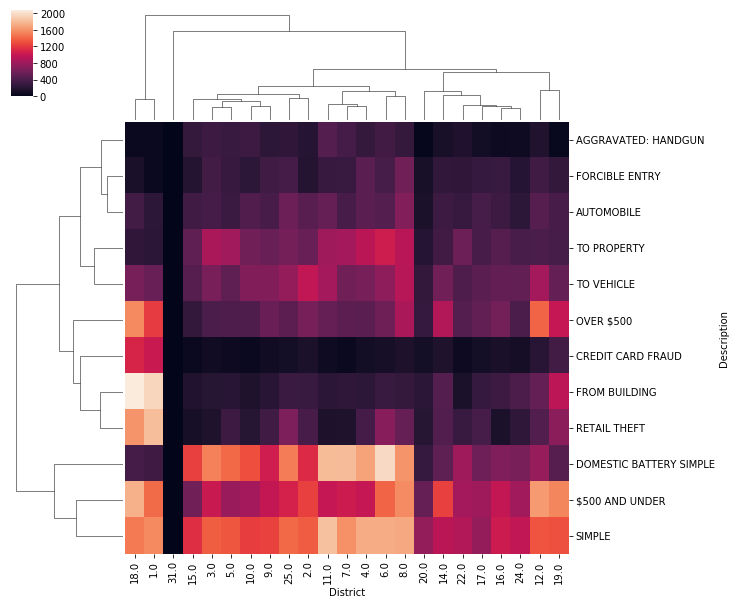

In [47]:
sns.clustermap(t)

## We'll also normalize vertically across District. 

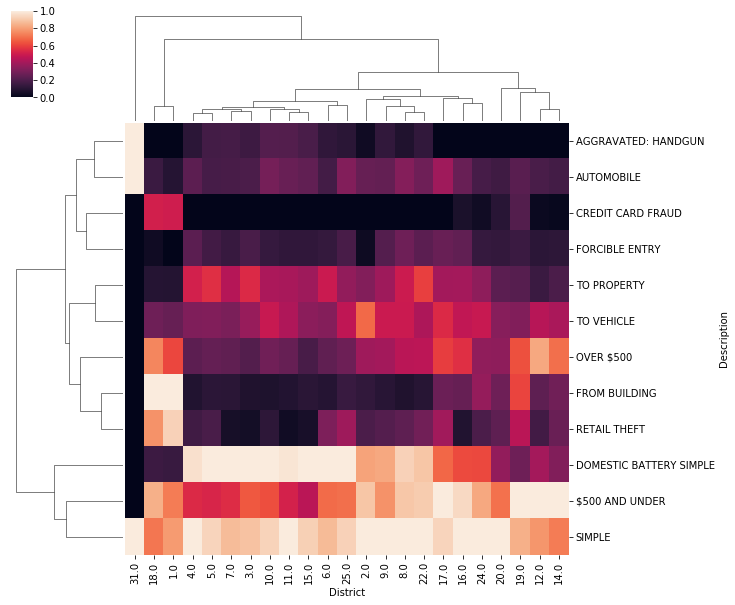

In [48]:
sns.clustermap(t,standard_scale=1) 

## We'll also normalize horizontally across crime types.

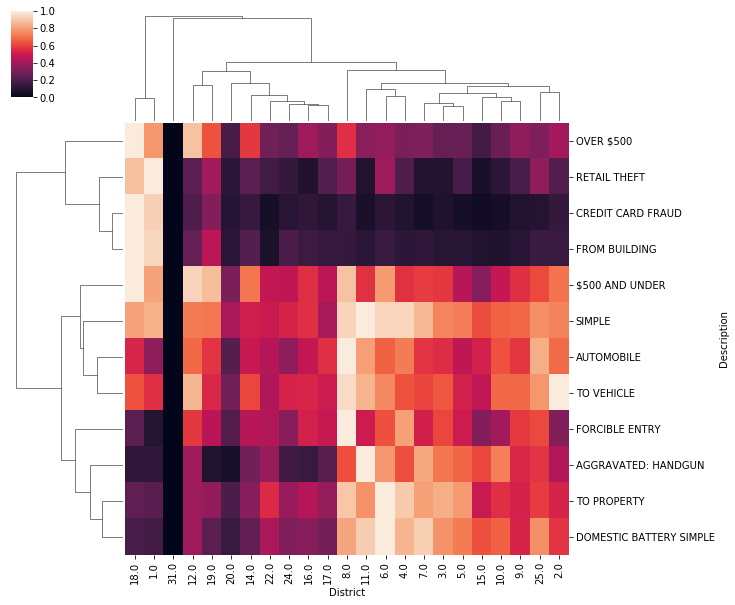

In [49]:
sns.clustermap(t,standard_scale=0) 

## We can also take a look at the trend of 5 of the most common criminal activities over a period of time. For this analysis, let's look at monthly trends.

In [79]:
comm_crimes_2017 = pd.DataFrame(crimes[crimes['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])

In [80]:
grouper = comm_crimes_2017.groupby([pd.Grouper(freq='M'), 'Primary Type'])

In [81]:
data_2017 = grouper['Primary Type'].count().unstack()

## We observe that, within the time-scope of our data, criminal activity among 5 common types ramps up in the winter season from November-December, drops for a few months at the start of the year, and then gradually increases as the end of the year approaches once more.

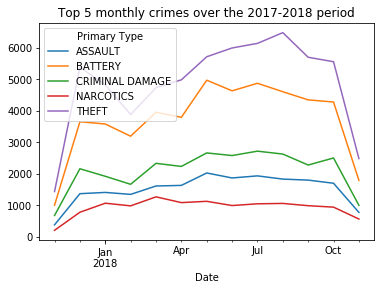

In [82]:
data_2017.plot()
plt.title("Top 5 monthly crimes over the 2017-2018 period")
plt.show()

## Let's re-examine the crime types and study one in particular.

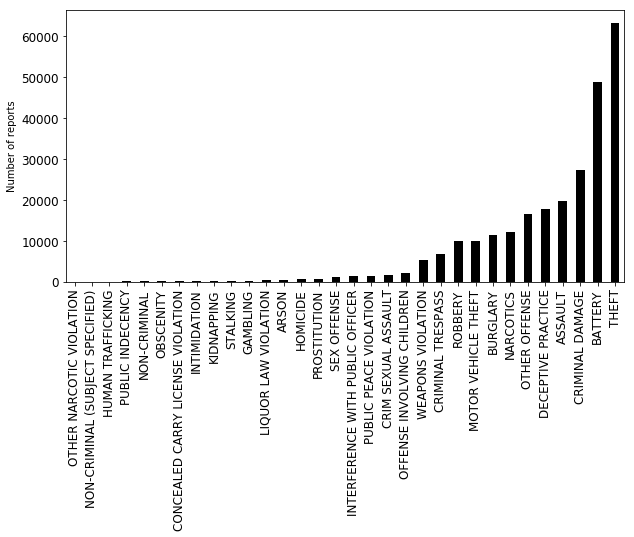

In [50]:
plotdat(df,'Primary Type')

## We want to take a deeper look into Narcotics. We think a study would show interesting dynamics and different distributions across different areas of the city. Shown below is the top ten narcotic crimes across Chicago. 

In [51]:
cat=df[df['Primary Type']=='NARCOTICS']
c=cat['Description'].value_counts()
c=c.sort_values(ascending=False)
c.head(10)

POSS: HEROIN(WHITE)               2318
POSS: CANNABIS 30GMS OR LESS      1310
POSS: CRACK                       1190
MANU/DEL:CANNABIS OVER 10 GMS     1007
FOUND SUSPECT NARCOTICS            969
MANU/DELIVER: HEROIN (WHITE)       908
POSS: CANNABIS MORE THAN 30GMS     818
MANU/DEL:CANNABIS 10GM OR LESS     637
SOLICIT NARCOTICS ON PUBLICWAY     540
POSS: COCAINE                      537
Name: Description, dtype: int64

In [52]:
t=types_districts(cat,70)

## Once again, clustering the crimes that fall under narcotics, we can examine the distribution of narcotic crimes across each district in Chicago. Based on non-normalized data below, we can see that district 11 is noticably more active in narcotic-based criminal activity, with a notably higher than average amount of heroin-related activity, as well as crimes involving crack and cannabis.

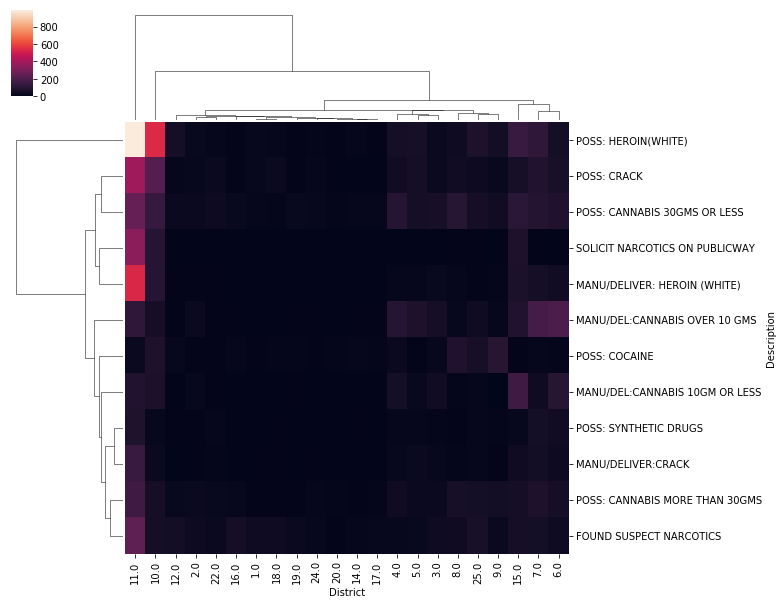

In [53]:
sns.clustermap(t)

## We'll also normalize the data vertically across districts.

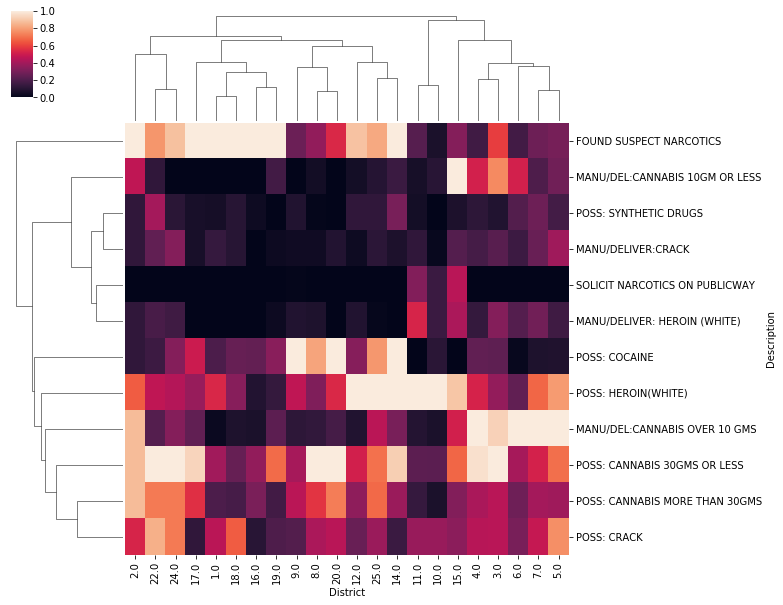

In [54]:
sns.clustermap(t,standard_scale=1)

## We'll also normalize horizontally across narcotic crime descriptions. On average, and with respect to narcotic activity in other districts, district 11 is still considerably more active but interestingly has a low value for crimes involving cocaine; the opposite is true for districts 8 and 25.

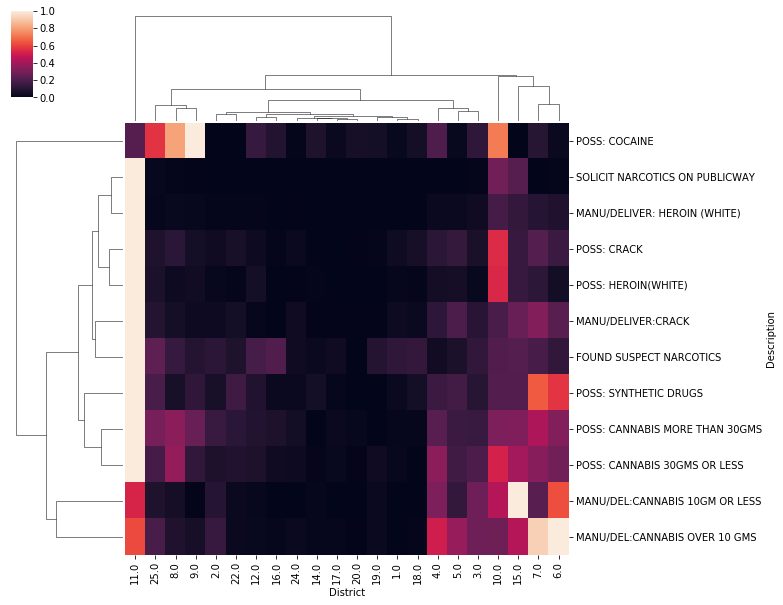

In [55]:
sns.clustermap(t,standard_scale=0)

## Let's take a look at drug dynamics over a period of time. The top three Narcotic crimes, as seen above, are the possession of white heroin, cannabis of 30gms or less and crack.

In [89]:
narc_2017 = pd.DataFrame(crimes[crimes['Description'].isin(['POSS: HEROIN(WHITE)','POSS: CANNABIS 30GMS OR LESS', 'POSS: CRACK'])]['Description'])

## Observing the trend of the top 3 narcotic crimes on a monthly basis shows that specific narcotics do not each have a very unique trend or pattern of occurence, and largely follows a similar trend of general drug possession.

In [99]:
grouper = narc_2017.groupby([pd.Grouper(freq='M'), 'Description'])

In [100]:
narc_data_2017 = grouper['Description'].count().unstack()

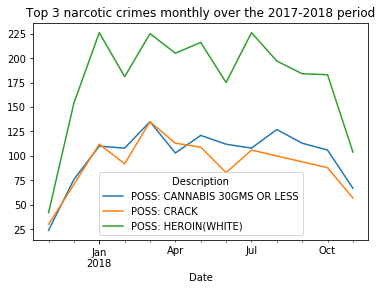

In [101]:
narc_data_2017.plot()
plt.title("Top 3 narcotic crimes monthly over the 2017-2018 period")
plt.show()

## Although an interesting observation from the above monthly trend analysis, is that there are some periods, namely around April-May and June-July where possession of cannabis increases while possession of crack decreases and vice versa. To see if we can possibly see more patterns unique to each narcotic, we can break the analysis down to days; it appears that crack and heroin possession follow a similar trend, whereas cannabis possession albeit still following a similar trend to the other two narcotics, follows them less similarly.

In [102]:
grouper = narc_2017.groupby([pd.Grouper(freq='W'), 'Description'])

In [103]:
narc_data_2017 = grouper['Description'].count().unstack()

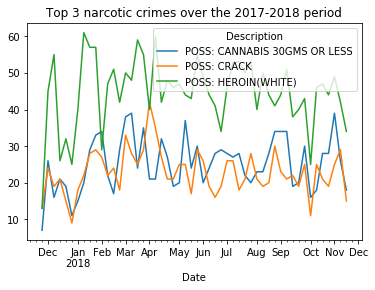

In [104]:
narc_data_2017.plot()
plt.title("Top 3 narcotic crimes over the 2017-2018 period")
plt.show()

# Ethical Considerations:

### Some ethical considerations and issues become relevant when on the topic of predictive policing based on trend analysis. In the current condition of the US, accountability for ethical law enforcement remains questionable; even with ample evidence that shines a light on the poor ethics in policing, the justice system tends to turn a blind eye. When conducting a study involving the presence of law enforcement, it's important that the conclusions and the insights are meaningful and accurate as incorrect assumptions may lead to a justification for said poor ethics by law enforcement, which already lacks accountability on its own. As is commonly said, a correlation does not mean causation.

### We believe that there are many potential benefits to be had by continuing this study. One benefit is that the Chicago PD may be able to use our analysis to decide where to allocate their resources, both in the crimes they pursue and the communities they patrol. As previously stated, one main potential harm is that the PD may use this analysis and become overzealous. They may now over-allocate their resources and cause an unintended consequence. For example, if they dedicate more resources to homicide, they may see a reduction in the enforcement of other crimes those resources were previously dedicated to. As for the communities, the police may send more officers into the more crime-filled areas, only to cause other communities to experience more crime in the absence of the previously stationed officers. Although this is a possibility, the potential of enforcing crime more efficiently and effectively is certainly something that needs to be pursued moving forward, and utilizing data in this manner may be a great step towards that. 